## HW1 Problem 3 : Visualize LP

In [3]:
from hw1_p1_lp import build_model, solve_with_gurobi
import numpy as np

For we get the solution by *Gurobi*:

In [18]:
A = np.array([[1,2],[3,1]])
b = np.array([8,9])
c = np.array([3,2])
x_opt, val_opt = solve_with_gurobi(A, b, c)

print(x_opt)

Gurobi Optimizer version 13.0.1 build v13.0.1rc0 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 2 columns and 4 nonzeros (Max)
Model fingerprint: 0xb609e0e4
Model has 2 linear objective coefficients
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [2e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+00, 9e+00]

Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+30   2.500000e+30   5.000000e+00      0s
       2    1.2000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.200000000e+01
[2. 3.]


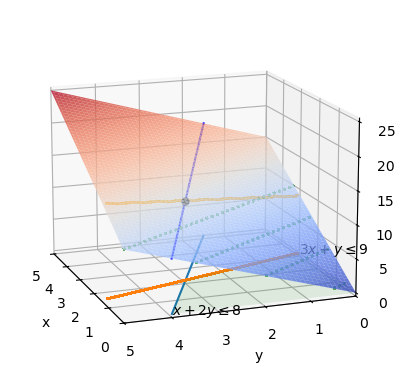

In [32]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

num=100
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X, Y = np.meshgrid(np.linspace(0, 5, num), np.linspace(0, 5, num))

Z = 3*X + 2*Y

def project_to_hyperplane(X, Y):
    return 3*X+2*Y

f1 = (8 - X)/2
f2 = 9 - 3*X

def objective_contour(X, Y, c):
    return (c - 3 * X)/2

# Plot the 3D surface
ax.plot_surface(X, Y, Z, alpha=0.8, cmap=cm.coolwarm)
ax.plot(X, f1, zs=0, axlim_clip=True)
ax.plot(X, f2, zs=0, axlim_clip=True)
f = np.where(f1 < f2, f1, f2)
ax.fill_between(x1=X, y1=0, z1 = 0, x2=X, y2=f, z2=0, facecolor='green', alpha=.1, axlim_clip=True)
ax.plot(X, f1, zs=project_to_hyperplane(X, f1), color='blue', axlim_clip=True)
ax.plot(X, f2, zs=project_to_hyperplane(X, f2), color='orange', axlim_clip=True)
for i in range(1, 12, 3):
    contour = objective_contour(X, Y, i)
    ax.plot(X, contour, zs=project_to_hyperplane(X, contour), linestyle=':', color='green', alpha=0.6, axlim_clip=True)
ax.plot(2, 3, 12, marker='o',color='black', alpha=1, markersize=5)
ax.set_xlim(0,5)
ax.set_ylim(0,5)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.text(0, 4, 0, s=r'$x+2y \leq 8$', fontsize=10)
ax.text(3, 0, 0, s=r'$3x+y \leq 9$', fontsize=10)

ax.view_init(elev=15., azim=160)


This plot is self-explanatory, the max is clearly at $(2,3)$ aligning with the model solution. It's also clear that with the profit lines sliding out, the last point of contact with the feasible region is at the vertex $(2,3)$. 